In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Reading datasets
df_2016 = pd.read_csv('NBA-season-2016-2017.csv')
df_2017 = pd.read_csv('NBA-season-2017-2018.csv')
df_2018 = pd.read_csv('NBA-season-2018-2019.csv')
df_players = pd.read_csv('NBA-playerlist.csv')

# Dataset Preprocessing

In [4]:
# Rows with value '18' in EVENTMSGTYPE column does not provide any information
df_2018.loc[df_2018['EVENTMSGTYPE'] == 18].head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
42,42,0,18,63,21800794,NaN,NaN,7:05,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,12 - 6,-6,NaN,9:18 PM
203,203,1,18,313,21800794,NaN,NaN,0:54,2,0.0,...,0,NaN,NaN,NaN,NaN,NaN,61 - 55,-6,NaN,10:00 PM
335,335,0,18,486,21800794,NaN,NaN,0:00,3,0.0,...,0,NaN,NaN,NaN,NaN,NaN,94 - 80,-14,NaN,10:47 PM
556,107,0,18,159,21800982,NaN,NaN,0:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,23 - 29,6,NaN,8:36 PM
827,378,0,18,559,21800982,NaN,NaN,7:30,4,0.0,...,0,NaN,NaN,NaN,NaN,NaN,87 - 93,6,NaN,9:55 PM


In [5]:
# Remove rows with value '18' in EVENTMSGTYPE column from all datasets
df_2016 = df_2016[df_2016.EVENTMSGTYPE != 18]
df_2017 = df_2017[df_2017.EVENTMSGTYPE != 18]
df_2018 = df_2018[df_2018.EVENTMSGTYPE != 18]

In [6]:
# Sort games from oldest to latest in dataset
df_2016 = df_2016.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)
df_2017 = df_2017.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)
df_2018 = df_2018.sort_values(["GAME_ID", "EVENTNUM"]).reset_index(drop=True)

***
# Descriptive Statistics

SAS committed the least amount of fouls
PHX committed the most amount of fouls
The mean number for fouls committed of an NBA team is 3534


Text(0, 0.5, 'Fouls Committed')

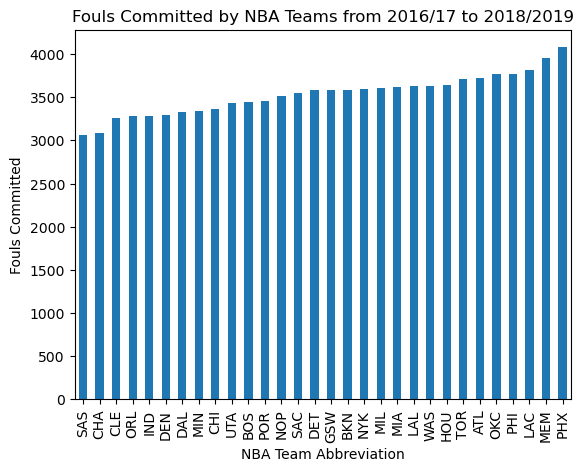

In [7]:
# Fouls called against each team
teamFouls_16 = df_2016.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouls_17 = df_2017.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouls_18 = df_2018.groupby('PLAYER1_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())

aggregate_teamFouls = pd.concat([teamFouls_16, teamFouls_17, teamFouls_18], axis=1)
teamFouls = aggregate_teamFouls.sum(axis=1)

min_teamFouls = teamFouls.idxmin()
max_teamFouls = teamFouls.idxmax()
mean_teamFouls = int(teamFouls.mean())
print(f"{min_teamFouls} committed the least amount of fouls")
print(f"{max_teamFouls} committed the most amount of fouls")
print(f"The mean number for fouls committed of an NBA team is {mean_teamFouls}")

sorted_teamFouls = teamFouls.sort_values()
sorted_teamFouls.plot(kind='bar')
plt.title("Fouls Committed by NBA Teams from 2016/17 to 2018/2019")
plt.xlabel("NBA Team Abbreviation")
plt.ylabel("Fouls Committed")

In three season datasets combined, the NBA team that has committed the most fouls is PHX, also known as the Phoenix Suns, the NBA team that has committed the least amount of fouls is SAS, also known as the San Antonio Spurs. Throughout the 3 seasons, the average amount of fouls an NBA team has committed is 3534.

CHI is the least fouled team
LAC is the most fouled team
The mean number for fouls called for an NBA team is 3451


Text(0, 0.5, 'Fouls Committed Against')

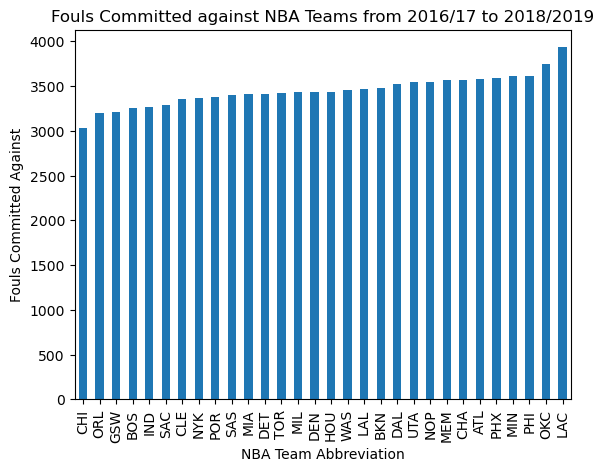

In [8]:
# Fouls called for each team
teamFouleds_16 = df_2016.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouleds_17 = df_2017.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())
teamFouleds_18 = df_2018.groupby('PLAYER2_TEAM_ABBREVIATION')['EVENTMSGTYPE'].apply(lambda x: x[x == 6].count())

aggregate_teamFouleds = pd.concat([teamFouleds_16, teamFouleds_17, teamFouleds_18], axis=1)
teamFouleds = aggregate_teamFouleds.sum(axis=1)

min_teamFouleds = teamFouleds.idxmin()
max_teamFouleds = teamFouleds.idxmax()
mean_teamFouleds = int(teamFouleds.mean())
print(f"{min_teamFouleds} is the least fouled team")
print(f"{max_teamFouleds} is the most fouled team")
print(f"The mean number for fouls called for an NBA team is {mean_teamFouleds}")

sorted_teamFouleds = teamFouleds.sort_values()
sorted_teamFouleds.plot(kind='bar')
plt.title("Fouls Committed against NBA Teams from 2016/17 to 2018/2019")
plt.xlabel("NBA Team Abbreviation")
plt.ylabel("Fouls Committed Against")

In three season datasets combined, the team that has been fouled by their opponents the most is LAC, also known as the Los Angeles Clippers, while the team that has been fouled the least is CHI, also known as the Chicago Bulls. Throughout the 3 seasons, the average amount an NBA team  has been fouled by their opponent is 3451.

In [9]:
# Fouls per game, and how many fouls were committed by home teams, and visitor teams
df16_fouls = df_2016.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())
df17_fouls = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())
df18_fouls = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[x.EVENTMSGTYPE == 6].count())

df18_fouls.head()

,EVENTMSGTYPE,HOMEDESCRIPTION,VISITORDESCRIPTION
GAME_ID,,,
21800001,40,20,20
21800002,50,29,21
21800003,44,19,25
21800004,46,21,25
21800005,42,24,18


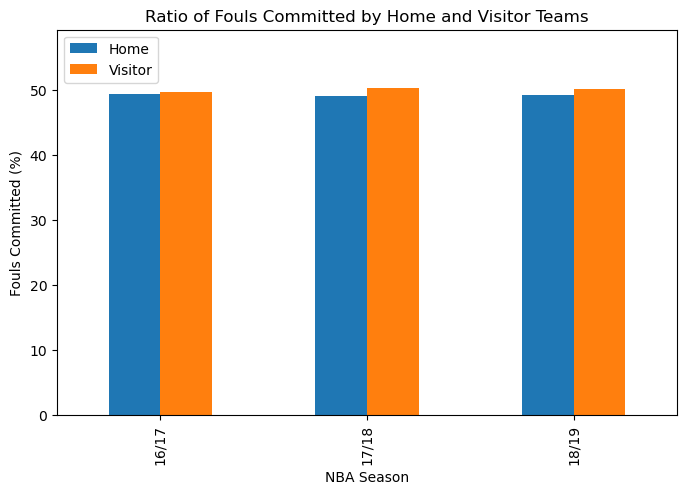

In [10]:
data = [[df16_fouls['HOMEDESCRIPTION'].sum() / df16_fouls['EVENTMSGTYPE'].sum() * 100, df16_fouls['VISITORDESCRIPTION'].sum() / df16_fouls['EVENTMSGTYPE'].sum() * 100],
        [df17_fouls['HOMEDESCRIPTION'].sum() / df17_fouls['EVENTMSGTYPE'].sum() * 100, df17_fouls['VISITORDESCRIPTION'].sum() / df17_fouls['EVENTMSGTYPE'].sum() * 100],
        [df18_fouls['HOMEDESCRIPTION'].sum() / df18_fouls['EVENTMSGTYPE'].sum() * 100, df18_fouls['VISITORDESCRIPTION'].sum() / df18_fouls['EVENTMSGTYPE'].sum() * 100]
]
total_fouls = df_2016['EVENTMSGTYPE'].value_counts()[6] + df_2017['EVENTMSGTYPE'].value_counts()[6] + df_2018['EVENTMSGTYPE'].value_counts()[6]
foulPercentage = pd.DataFrame(data, columns=['Home', "Visitor"], index=['16/17', '17/18', '18/19'])

foulPercentage.plot(kind='bar', figsize=(8,5)).legend(loc='upper left')
plt.title("Ratio of Fouls Committed by Home and Visitor Teams")
plt.xlabel("NBA Season")
plt.ylabel("Fouls Committed (%)")
plt.margins(y=0.18)

After analysing the datasets, a chart can be plotted to show the ratio of fouls committed by the home and visitor teams in each season provided by the dataset. From the chart, it can be observed that there is a slight bias towards the home team, where Home teams commit less fouls compared to Visitor teams. This might be because the referee is pressured by the fans of the stadium, which leads to the referee making decisions that favour the home team more. Additionally, players of the home team also commonly play better, this phenomenon is known as home court advantage, forcing the visitor team’s players to commit more fouls in order to stop the home team from scoring points.

***
# Classification

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

### Data Transformation for classification

Gathering winners of each NBA game in 2017/18 season & 2018/19 season

In [19]:
# Score Margins for each Game in the datasets
# Positive SCOREMARGIN = Home team wins
# Negative SCOREMARGIN = Visitor team wins

# 17/18 Season dataset
winners_17 = df_2017[(df_2017["EVENTMSGTYPE"] == 13) & (df_2017["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_17['WINNER'] = winners_17.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )
# 18/19 Season dataset
winners_18 = df_2018[(df_2018["EVENTMSGTYPE"] == 13) & (df_2018["PERIOD"] == 4)][['GAME_ID', 'SCOREMARGIN']]
winners_18['WINNER'] = winners_18.apply(lambda x: 
                                        'TIE' if (x['SCOREMARGIN'] == 'TIE') else 
                                        'VISITOR' if (x['SCOREMARGIN'][0] == '-') else
                                        'HOME',
                                        axis=1
                                       )

winners_18.head()

,GAME_ID,SCOREMARGIN,WINNER
490,21800001,18,HOME
1009,21800002,8,HOME
1496,21800003,-1,VISITOR
1969,21800004,3,HOME
2424,21800005,28,HOME


Pairing the home and visitor team in each NBA game with the final results

In [20]:
# Home and Visitor Teams, along with the winner of each game in the dataset
schedule_2017 = df_2017[(df_2017["EVENTMSGTYPE"] == 10) & (df_2017["PERIOD"] == 1) & (df_2017['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]
schedule_2018 = df_2018[(df_2018["EVENTMSGTYPE"] == 10) & (df_2018["PERIOD"] == 1) & (df_2018['PCTIMESTRING'] == '12:00')][['GAME_ID', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_ABBREVIATION']]

schedule_wins_17 = pd.merge(schedule_2017, winners_17, on=['GAME_ID'])
schedule_wins_18 = pd.merge(schedule_2018, winners_18, on=['GAME_ID'])

schedule_wins_17.columns =['GAME_ID', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME', 'SCOREMARGIN', 'WINNER']
schedule_wins_18.columns =['GAME_ID', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME', 'SCOREMARGIN', 'WINNER']

schedule_wins_18.head()

,GAME_ID,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,SCOREMARGIN,WINNER
0,21800001,1.610613e+09,BOS,1.610613e+09,PHI,18,HOME
1,21800002,1.610613e+09,GSW,1.610613e+09,OKC,8,HOME
2,21800003,1.610613e+09,CHA,1.610613e+09,MIL,-1,VISITOR
3,21800004,1.610613e+09,DET,1.610613e+09,BKN,3,HOME
4,21800005,1.610613e+09,IND,1.610613e+09,MEM,28,HOME


In [21]:
# Name of winner for each Game in the datasets
# 17/18 Season dataset
results_17 = schedule_wins_17[['GAME_ID', 'HOME_NAME', 'VISITOR_NAME', 'WINNER']][schedule_wins_17['WINNER'] != 'TIE']
results_17['WINNER_TEAM'] = results_17.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['HOME_NAME'] if (x['WINNER'] == 'HOME') else
                                        x['VISITOR_NAME'],
                                        axis=1
                                       )
# 18/19 Season dataset
results_18 = schedule_wins_18[['GAME_ID', 'HOME_NAME', 'VISITOR_NAME', 'WINNER']][schedule_wins_18['WINNER'] != 'TIE']
results_18['WINNER_TEAM'] = results_18.apply(lambda x: 
                                        'TIE' if (x['WINNER'] == 'TIE') else 
                                        x['HOME_NAME'] if (x['WINNER'] == 'HOME') else
                                        x['VISITOR_NAME'],
                                        axis=1
                                       )

results_18.head()

,GAME_ID,HOME_NAME,VISITOR_NAME,WINNER,WINNER_TEAM
0,21800001,BOS,PHI,HOME,BOS
1,21800002,GSW,OKC,HOME,GSW
2,21800003,CHA,MIL,VISITOR,MIL
3,21800004,DET,BKN,HOME,DET
4,21800005,IND,MEM,HOME,IND


***
# Predicting the result of an NBA game based on Field Goal Percentage

In [22]:
df17_fieldGoalPct = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))
df18_fieldGoalPct = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: (x[x.EVENTMSGTYPE == 1].count()) / (x[(x.EVENTMSGTYPE == 1) | (x.EVENTMSGTYPE == 2)].count()))

df17_fieldGoalPct = df17_fieldGoalPct.drop('EVENTMSGTYPE', axis=1)
df18_fieldGoalPct = df18_fieldGoalPct.drop('EVENTMSGTYPE', axis=1)

In [23]:
# 2017/18 Schedule with competing teams and their respective shot fieldGoalPct
schedule_fieldGoalPct_17 = pd.merge(df17_fieldGoalPct, schedule_2017, on= ['GAME_ID'])
schedule_fieldGoalPct_17.columns = ['GAME_ID', 'HOME_FG_PCT', 'VISITOR_FG_PCT', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
# 2017/18 Schedule with competing teams and their respective shot fieldGoalPct, and the final score margin and winner
schedule_fieldGoalPct_wins_17 = pd.merge(schedule_fieldGoalPct_17, schedule_wins_17, on=['GAME_ID'])

# 2018/19 Schedule with competing teams and their respective shot fieldGoalPct
schedule_fieldGoalPct_18 = pd.merge(df18_fieldGoalPct, schedule_2018, on= ['GAME_ID'])
schedule_fieldGoalPct_18.columns = ['GAME_ID', 'HOME_FG_PCT', 'VISITOR_FG_PCT', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
# 2018/19 Schedule with competing teams and their respective shot fieldGoalPct, and the final score margin and winner
schedule_fieldGoalPct_wins_18 = pd.merge(schedule_fieldGoalPct_18, schedule_wins_18, on=['GAME_ID'])

schedule_fieldGoalPct_wins_18.head()

,GAME_ID,HOME_FG_PCT,VISITOR_FG_PCT,HOME_ID_x,HOME_NAME_x,VISITOR_ID_x,VISITOR_NAME_x,HOME_ID_y,HOME_NAME_y,VISITOR_ID_y,VISITOR_NAME_y,SCOREMARGIN,WINNER
0,21800001,0.411765,0.369565,1.610613e+09,BOS,1.610613e+09,PHI,1.610613e+09,BOS,1.610613e+09,PHI,18,HOME
1,21800002,0.411765,0.340206,1.610613e+09,GSW,1.610613e+09,OKC,1.610613e+09,GSW,1.610613e+09,OKC,8,HOME
2,21800003,0.405941,0.471910,1.610613e+09,CHA,1.610613e+09,MIL,1.610613e+09,CHA,1.610613e+09,MIL,-1,VISITOR
3,21800004,0.402062,0.459770,1.610613e+09,DET,1.610613e+09,BKN,1.610613e+09,DET,1.610613e+09,BKN,3,HOME
4,21800005,0.522222,0.287356,1.610613e+09,IND,1.610613e+09,MEM,1.610613e+09,IND,1.610613e+09,MEM,28,HOME


In [24]:
fieldGoalPct17_X_Train = schedule_fieldGoalPct_wins_17[['HOME_FG_PCT', 'VISITOR_FG_PCT']]
fieldGoalPct17_y_train = schedule_fieldGoalPct_wins_17['WINNER']

fieldGoalPct18_X_Train = schedule_fieldGoalPct_wins_18[['HOME_FG_PCT', 'VISITOR_FG_PCT']]
fieldGoalPct18_y_train = schedule_fieldGoalPct_wins_18['WINNER']

# Split dataframe for training and testing classifer
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(fieldGoalPct17_X_Train, fieldGoalPct17_y_train, test_size=0.2, random_state=42)
X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(fieldGoalPct18_X_Train, fieldGoalPct18_y_train, test_size=0.2, random_state=42)


### Decision Tree-based Classifier model

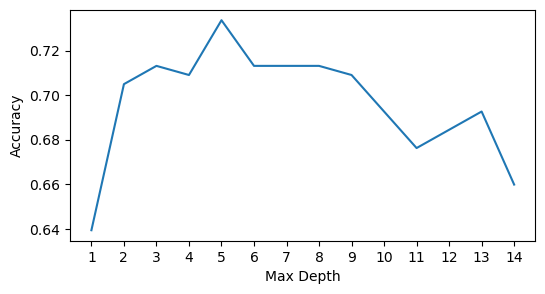

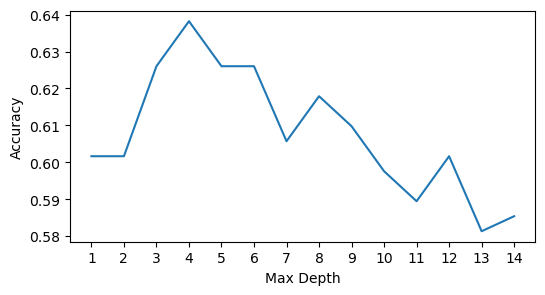

In [25]:
# Getting the best value for max_depth parameter in classfication model
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_17, y_train_17)
    y_pred = model.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_18, y_train_18)
    y_pred = model.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In the 2017/2018 datset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.64 to 0.72 accuracy, with the optimal <i>max_depth</i> parameter being 5 
<br>
For the 2017/2018 season dataset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.58 to 0.64 accuracy, with the optimal <i>max_depth</i> parameter being 4

Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage
Classification on 2017/18 NBA season:
Accuracy: 0.7336065573770492
              precision    recall  f1-score   support

        HOME       0.75      0.84      0.79       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.72      0.68      0.70        98

    accuracy                           0.73       244
   macro avg       0.49      0.51      0.50       244
weighted avg       0.70      0.73      0.71       244

Classification on 2018/19 NBA season:
Accuracy: 0.6382113821138211
              precision    recall  f1-score   support

        HOME       0.67      0.75      0.71       129
         TIE       0.00      0.00      0.00        20
     VISITOR       0.59      0.62      0.60        97

    accuracy                           0.64       246
   macro avg       0.42      0.46      0.44       246
weighted avg       0.59      0.64      0.61   

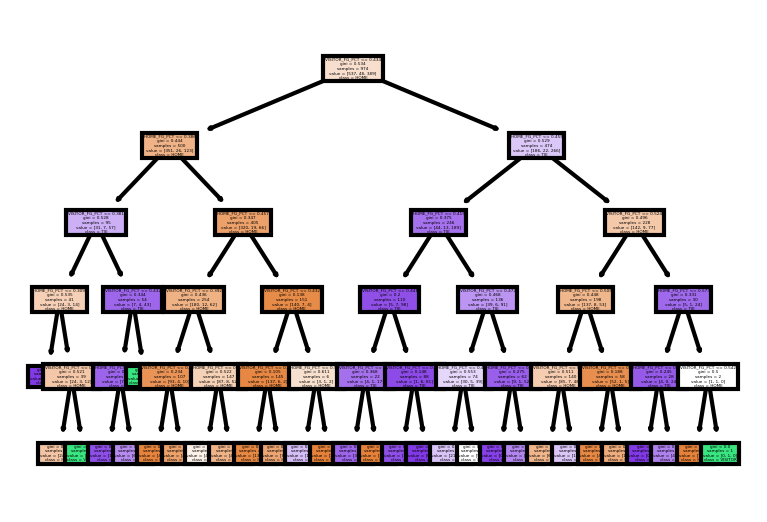

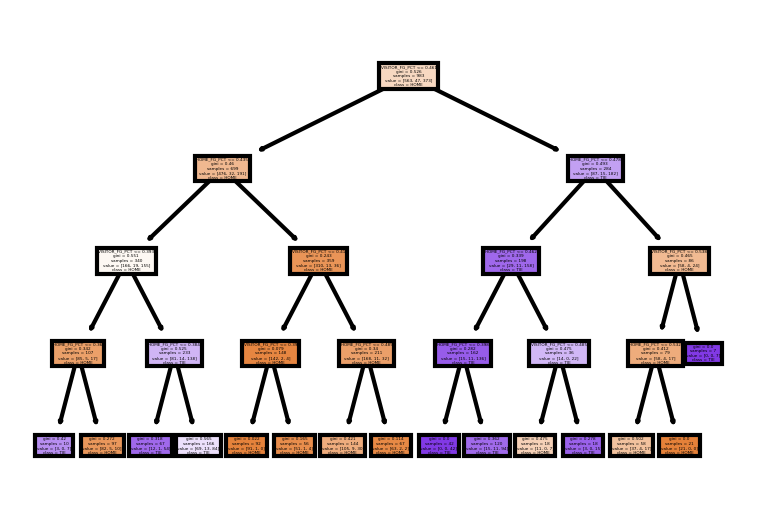

In [27]:
fn=fieldGoalPct17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
print("Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage")

# 2017/18 Dataset
dt = DecisionTreeClassifier(max_depth=5, random_state=42) # 5 is chosen as max_depth for this model
dt.fit(X_train_17, y_train_17)
y_pred = dt.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 2018/19 Dataset
dt = DecisionTreeClassifier(max_depth=4, random_state=42) # 4 is chosen as max_depth for this model
dt.fit(X_train_18, y_train_18)
y_pred = dt.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))
# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Random Forest-based Classifier model

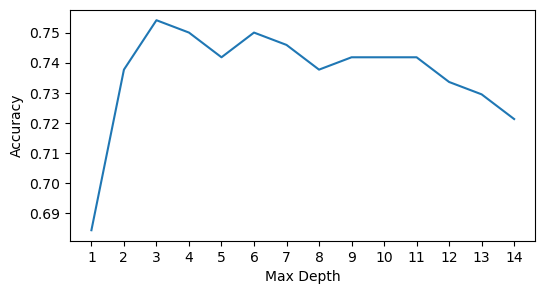

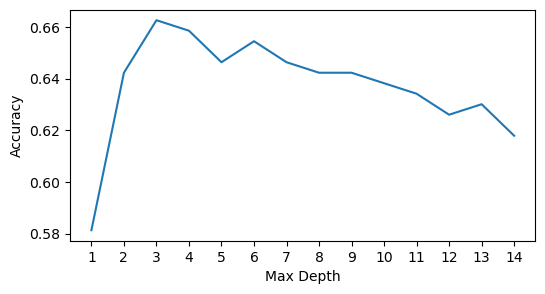

In [28]:
# Getting the best value for max_depth parameter in classfication model
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_17, y_train_17)
    y_pred = rf.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_18, y_train_18)
    y_pred = rf.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In the 2017/2018 datset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.69 to 0.75 accuracy, with the optimal <i>max_depth</i> parameter being 3 
<br>
For the 2017/2018 season dataset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.58 to 0.66 accuracy, with the optimal <i>max_depth</i> parameter being 3

Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage


Classification on 2017/18 NBA season:
Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

        HOME       0.79      0.81      0.80       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.70      0.78      0.74        98

    accuracy                           0.75       244
   macro avg       0.50      0.53      0.51       244
weighted avg       0.72      0.75      0.73       244



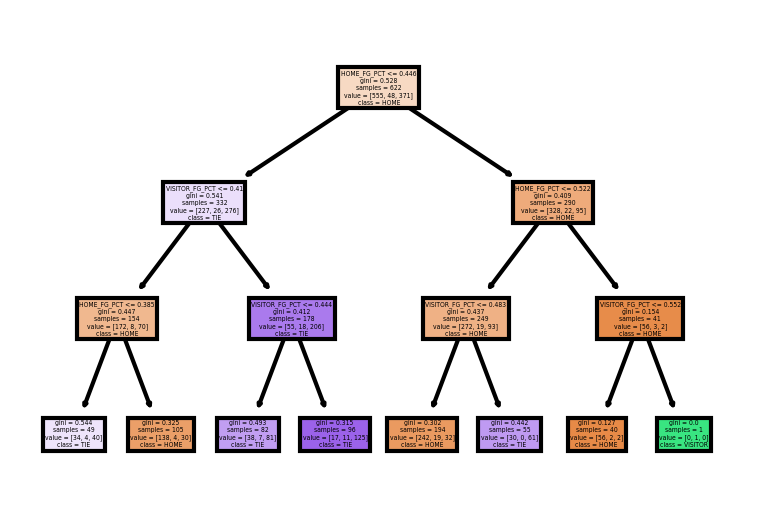

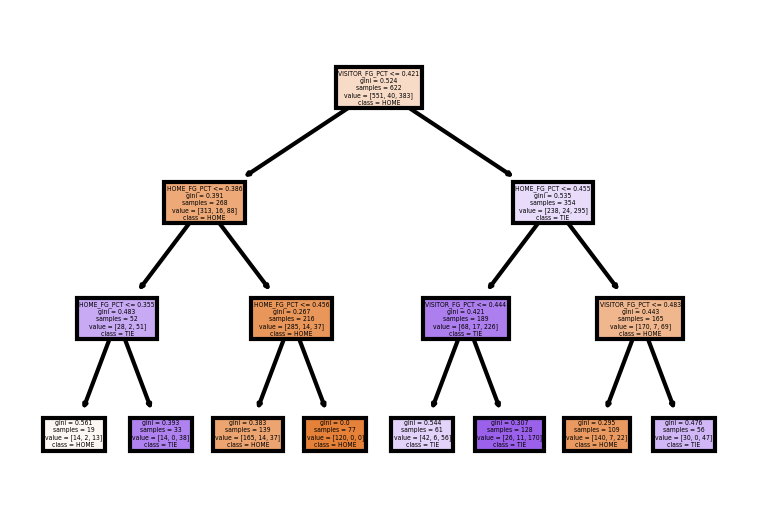

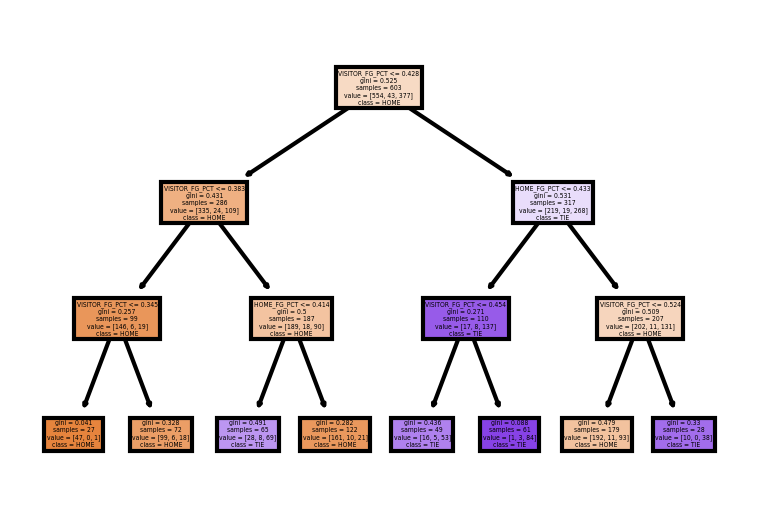

In [29]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage")
# 2017/18 Dataset
rf = RandomForestClassifier(max_depth=3, random_state=0) # 3 is chosen as max_depth for this model
rf.fit(X_train_17, y_train_17)
y_pred = rf.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Random Forest Visualisation
fn=fieldGoalPct17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);

Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage
Classification on 2018/19 NBA season:
Accuracy: 0.6626016260162602
              precision    recall  f1-score   support

        HOME       0.67      0.82      0.74       129
         TIE       0.00      0.00      0.00        20
     VISITOR       0.66      0.59      0.62        97

    accuracy                           0.66       246
   macro avg       0.44      0.47      0.45       246
weighted avg       0.61      0.66      0.63       246



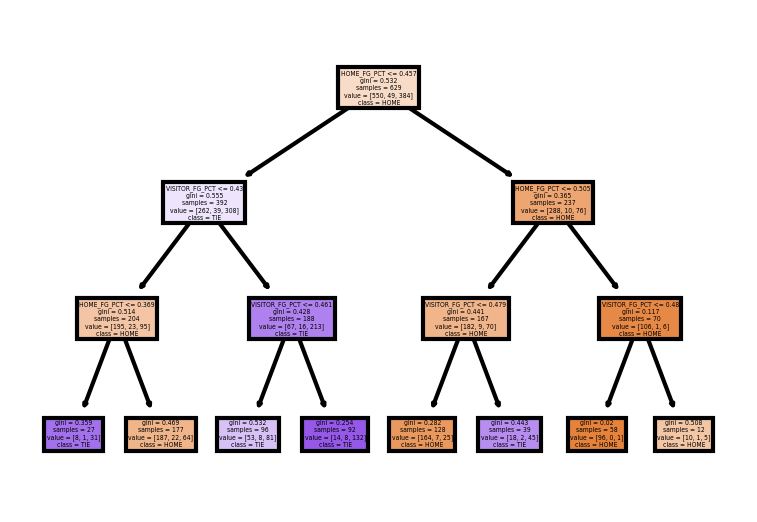

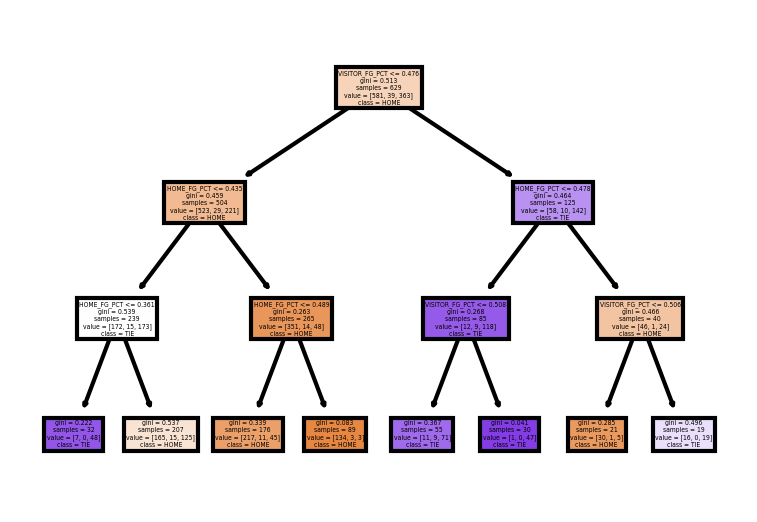

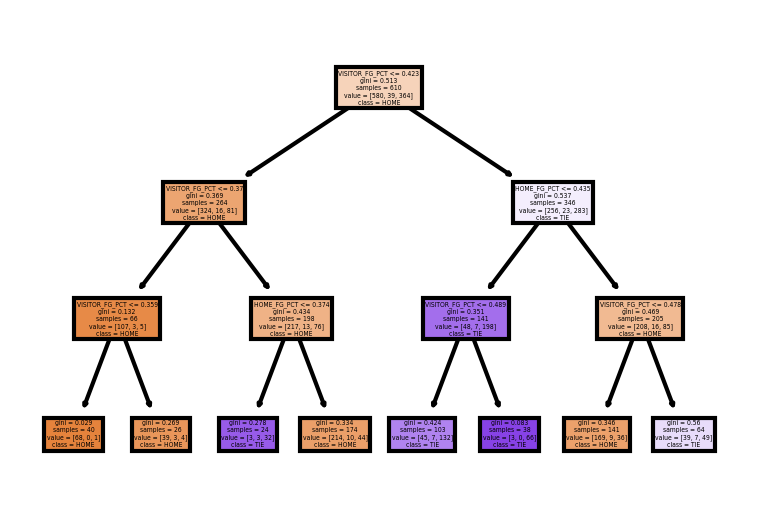

In [30]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's Field Goal Percentage")
# 2018/19 Dataset
rf = RandomForestClassifier(max_depth=3, random_state=0) # 3 is chosen as max_depth for this model
rf.fit(X_train_18, y_train_18)
y_pred = rf.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))

# Random Forest Visualisation
fn=fieldGoalPct18_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);

**Discussion**
<br>
From looking at the results above, we can see that around 63% to 75% of the winner of an NBA game can be predicted by using the Field Goal Percentage statistics of both teams. The classification model also seems to be able to predict the winners of the 2017/2018 NBA season more accurately than for the 2018/2019 NBA season. After comparing the performance of the two classification models, it can be concluded that the Random Forest-based classification model is the better classification model for predicting the winner of an NBA game based on the Field Goal Percentage of both teams.

**Recommendation**
<br>
We recommend NBA teams to be more efficient when shooting the ball and to look for scoring opportunities that have a higher success rate based on the fact that our classification model has shown that there is a significant correlation between field goal percentage and winning an NBA game.

Discovering correlation between Average Field Goal Percentage and Win Count

In [31]:
# Average Field Goal Percentage of every NBA team throughout the 2017/18 season
average_home_fieldGoalPct_17 = schedule_fieldGoalPct_17.groupby('HOME_NAME')['HOME_FG_PCT'].mean()
average_visitor_fieldGoalPct_17 = schedule_fieldGoalPct_17.groupby('VISITOR_NAME')['VISITOR_FG_PCT'].mean()
average_fieldGoalPct_17 = pd.concat([average_home_fieldGoalPct_17, average_visitor_fieldGoalPct_17], axis=1).mean(axis=1)

# Average Field Goal Percentage of every NBA team throughout the 2018/19 season
average_home_fieldGoalPct_18 = schedule_fieldGoalPct_18.groupby('HOME_NAME')['HOME_FG_PCT'].mean()
average_visitor_fieldGoalPct_18 = schedule_fieldGoalPct_18.groupby('VISITOR_NAME')['VISITOR_FG_PCT'].mean()
average_fieldGoalPct_18 = pd.concat([average_home_fieldGoalPct_18, average_visitor_fieldGoalPct_18], axis=1).mean(axis=1)

average_fieldGoalPct_18

ATL    0.428113
BKN    0.430115
BOS    0.440112
CHA    0.425442
CHI    0.433165
CLE    0.433008
DAL    0.426666
DEN    0.445507
DET    0.421563
GSW    0.458562
HOU    0.426763
IND    0.450699
LAC    0.448394
LAL    0.444760
MEM    0.423414
MIA    0.425443
MIL    0.447856
MIN    0.433577
NOP    0.448270
NYK    0.409531
OKC    0.431056
ORL    0.428131
PHI    0.445636
PHX    0.434447
POR    0.444520
SAC    0.443325
SAS    0.455860
TOR    0.448770
UTA    0.438781
WAS    0.445639
dtype: float64

In [32]:
# Win count of every NBA team in the 2017/18 & 2018/19 season
win_counts_17 = results_17.WINNER_TEAM.value_counts()
win_counts_18 = results_18.WINNER_TEAM.value_counts()

win_counts_18.head()

MIL    59
GSW    57
TOR    54
DEN    52
HOU    51
Name: WINNER_TEAM, dtype: int64

In [33]:
# Average Field Goal Percentage of an NBA team and their Win count in the 2017/18 season
fieldGoalPct_wins_17 = pd.concat([average_fieldGoalPct_17, win_counts_17], axis=1)
fieldGoalPct_wins_17.columns = ['AVERAGE_FG_PCT', 'WINS']

# Average Field Goal Percentage of an NBA team and their Win count in the 2018/19 season
fieldGoalPct_wins_18 = pd.concat([average_fieldGoalPct_18, win_counts_18], axis=1)
fieldGoalPct_wins_18.columns = ['AVERAGE_FG_PCT', 'WINS']

fieldGoalPct_wins_18

,AVERAGE_FG_PCT,WINS
ATL,0.428113,26
BKN,0.430115,37
BOS,0.440112,45
CHA,0.425442,38
CHI,0.433165,19
CLE,0.433008,19
DAL,0.426666,32
DEN,0.445507,52
DET,0.421563,36
GSW,0.458562,57


In the NBA 2017/18 season, the correlation between average field goal percentage and win count for an NBA team is: 
0.569904199791632
In the NBA 2018/19 season, the correlation between average field goal percentage and win count for an NBA team is: 
0.5577926465650369


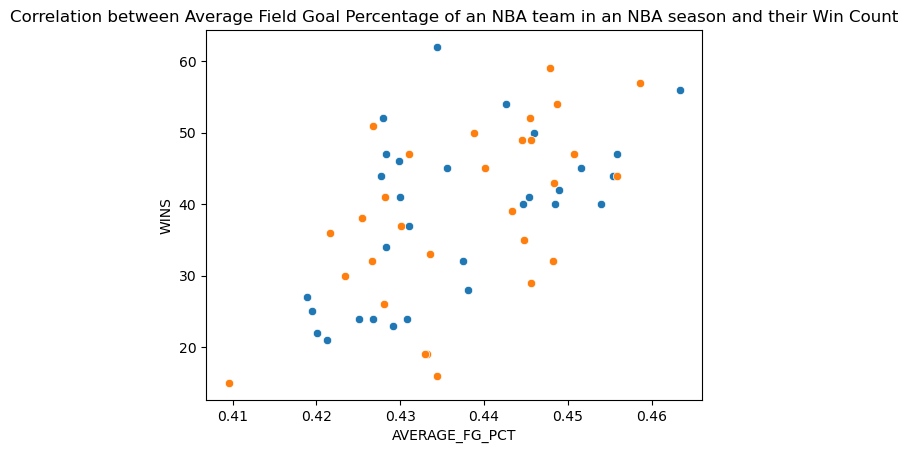

In [34]:
sns.scatterplot(x=fieldGoalPct_wins_17['AVERAGE_FG_PCT'], y=fieldGoalPct_wins_17['WINS'])
sns.scatterplot(x=fieldGoalPct_wins_18['AVERAGE_FG_PCT'], y=fieldGoalPct_wins_18['WINS'])
plt.title("Correlation between Average Field Goal Percentage of an NBA team in an NBA season and their Win Count")

print("In the NBA 2017/18 season, the correlation between average field goal percentage and win count for an NBA team is: ")
print(fieldGoalPct_wins_17['AVERAGE_FG_PCT'].corr(fieldGoalPct_wins_17['WINS']))
print("In the NBA 2018/19 season, the correlation between average field goal percentage and win count for an NBA team is: ")
print(fieldGoalPct_wins_18['AVERAGE_FG_PCT'].corr(fieldGoalPct_wins_18['WINS']))

From the scatter plot above, a general trend can be observed where the higher a team’s average field goal percentage is, the higher the team’s win count.

***
# Predicting the result of an NBA game based on a team's assist and rebound statistics

Gathering rebound statistics of every team in every game

In [35]:
# Total Rebounds per game, and how many rebounds did the home teams, and visitor teams get
df17_rebounds = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())
df18_rebounds = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']].apply(lambda x: x[(x.EVENTMSGTYPE == 4)].count())

In [36]:
# 2017/18 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_17 = pd.merge(df17_rebounds, schedule_2017, on= ['GAME_ID'])
schedule_rebounds_17.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_17['REBOUNDS_MARGIN'] = schedule_rebounds_17.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)

# 2018/19 Schedule with competing teams and their respective shot attempt counts
schedule_rebounds_18 = pd.merge(df18_rebounds, schedule_2018, on= ['GAME_ID'])
schedule_rebounds_18.columns = ['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_rebounds_18['REBOUNDS_MARGIN'] = schedule_rebounds_18.apply(lambda x: x['HOME_REBOUNDS'] - x['VISITOR_REBOUNDS'], axis=1)
schedule_rebounds_18

,GAME_ID,TOTAL_REBOUNDS,HOME_REBOUNDS,VISITOR_REBOUNDS,HOME_ID,HOME_NAME,VISITOR_ID,VISITOR_NAME,REBOUNDS_MARGIN
0,21800001,121,64,57,1.610613e+09,BOS,1.610613e+09,PHI,7
1,21800002,125,66,59,1.610613e+09,GSW,1.610613e+09,OKC,7
2,21800003,107,45,62,1.610613e+09,CHA,1.610613e+09,MIL,-17
3,21800004,105,54,51,1.610613e+09,DET,1.610613e+09,BKN,3
4,21800005,106,67,39,1.610613e+09,IND,1.610613e+09,MEM,28
...,...,...,...,...,...,...,...,...,...
1224,21801226,119,63,56,1.610613e+09,MIL,1.610613e+09,OKC,7
1225,21801227,107,60,47,1.610613e+09,SAS,1.610613e+09,DAL,13
1226,21801228,108,61,47,1.610613e+09,DEN,1.610613e+09,MIN,14
1227,21801229,122,58,64,1.610613e+09,LAC,1.610613e+09,UTA,-6


Gathering assist statistics of every team in every game

In [37]:
# Total assists per game, and how many assists did the home teams, and visitor teams get
df17_assists = df_2017.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION', 'PLAYER2_ID']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) & (x.PLAYER2_ID != 0)].count())
df18_assists = df_2018.groupby('GAME_ID')[['EVENTMSGTYPE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION', 'PLAYER2_ID']].apply(lambda x: x[(x.EVENTMSGTYPE == 1) & (x.PLAYER2_ID != 0)].count())

df17_assists = df17_assists.drop('PLAYER2_ID', axis=1)
df18_assists = df18_assists.drop('PLAYER2_ID', axis=1)


In [38]:
# 2017/18 Schedule with competing teams and their respective shot attempt counts
schedule_assists_17 = pd.merge(df17_assists, schedule_2017, on= ['GAME_ID'])
schedule_assists_17.columns = ['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_assists_17['ASSISTS_MARGIN'] = schedule_assists_17.apply(lambda x: x['HOME_ASSISTS'] - x['VISITOR_ASSISTS'], axis=1)

# 2018/19 Schedule with competing teams and their respective shot attempt counts
schedule_assists_18 = pd.merge(df18_assists, schedule_2018, on= ['GAME_ID'])
schedule_assists_18.columns = ['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'HOME_ID', 'HOME_NAME', 'VISITOR_ID', 'VISITOR_NAME']
schedule_assists_18['ASSISTS_MARGIN'] = schedule_assists_18.apply(lambda x: x['HOME_ASSISTS'] - x['VISITOR_ASSISTS'], axis=1)

Combining Assists, Rebound, and Winner dataframes into a single dataframe

In [39]:
schedule_assists_rebounds_17 = pd.merge(pd.merge(schedule_assists_17[['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN']],schedule_rebounds_17[['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']], on=['GAME_ID']), winners_17, on=['GAME_ID'])
schedule_assists_rebounds_18 = pd.merge(pd.merge(schedule_assists_18[['GAME_ID', 'TOTAL_ASSISTS', 'HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN']],schedule_rebounds_18[['GAME_ID', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']], on=['GAME_ID']), winners_18, on=['GAME_ID'])
schedule_assists_rebounds_18

,GAME_ID,TOTAL_ASSISTS,HOME_ASSISTS,VISITOR_ASSISTS,ASSISTS_MARGIN,TOTAL_REBOUNDS,HOME_REBOUNDS,VISITOR_REBOUNDS,REBOUNDS_MARGIN,SCOREMARGIN,WINNER
0,21800001,39,21,18,3,121,64,57,7,18,HOME
1,21800002,49,28,21,7,125,66,59,7,8,HOME
2,21800003,47,21,26,-5,107,45,62,-17,-1,VISITOR
3,21800004,49,21,28,-7,105,54,51,3,3,HOME
4,21800005,45,29,16,13,106,67,39,28,28,HOME
...,...,...,...,...,...,...,...,...,...,...,...
1224,21801226,67,27,40,-13,119,63,56,7,-11,VISITOR
1225,21801227,49,22,27,-5,107,60,47,13,11,HOME
1226,21801228,47,23,24,-1,108,61,47,14,4,HOME
1227,21801229,65,34,31,3,122,58,64,-6,TIE,TIE


In [40]:
assistsRebounds17_X_Train = schedule_assists_rebounds_17[['TOTAL_ASSISTS','HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']]
assistsRebounds17_y_train = schedule_assists_rebounds_17['WINNER']

assistsRebounds18_X_Train = schedule_assists_rebounds_18[['TOTAL_ASSISTS','HOME_ASSISTS', 'VISITOR_ASSISTS', 'ASSISTS_MARGIN', 'TOTAL_REBOUNDS', 'HOME_REBOUNDS', 'VISITOR_REBOUNDS', 'REBOUNDS_MARGIN']]
assistsRebounds18_y_train = schedule_assists_rebounds_18['WINNER']

# Split dataframe for training and testing classifer
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(assistsRebounds17_X_Train, assistsRebounds17_y_train, test_size=0.2, random_state=42)
X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(assistsRebounds18_X_Train, assistsRebounds18_y_train, test_size=0.2, random_state=42)


### Decision Tree-based Classifier Model

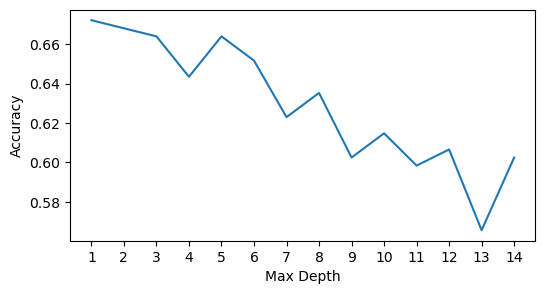

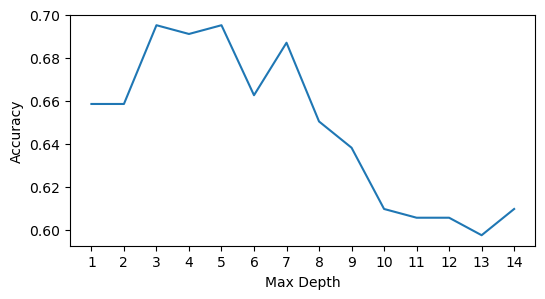

In [41]:
# Get optimal max_depth parameter
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_17, y_train_17)
    y_pred = model.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_18, y_train_18)
    y_pred = model.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In the 2017/2018 datset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.56 to 0.66 accuracy, with the optimal <i>max_depth</i> parameter being 5 
<br>
For the 2017/2018 season dataset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.6 to 0.7 accuracy, with the optimal <i>max_depth</i> parameter being 5

Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic
Classification on 2017/18 NBA season:
Accuracy: 0.6639344262295082
              precision    recall  f1-score   support

        HOME       0.72      0.72      0.72       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.61      0.67      0.64        98

    accuracy                           0.66       244
   macro avg       0.44      0.47      0.45       244
weighted avg       0.64      0.66      0.65       244

Classification on 2018/19 NBA season:
Accuracy: 0.6951219512195121
              precision    recall  f1-score   support

        HOME       0.69      0.84      0.76       129
         TIE       0.60      0.30      0.40        20
     VISITOR       0.71      0.59      0.64        97

    accuracy                           0.70       246
   macro avg       0.67      0.57      0.60       246
weighted avg       0.69      0.70      

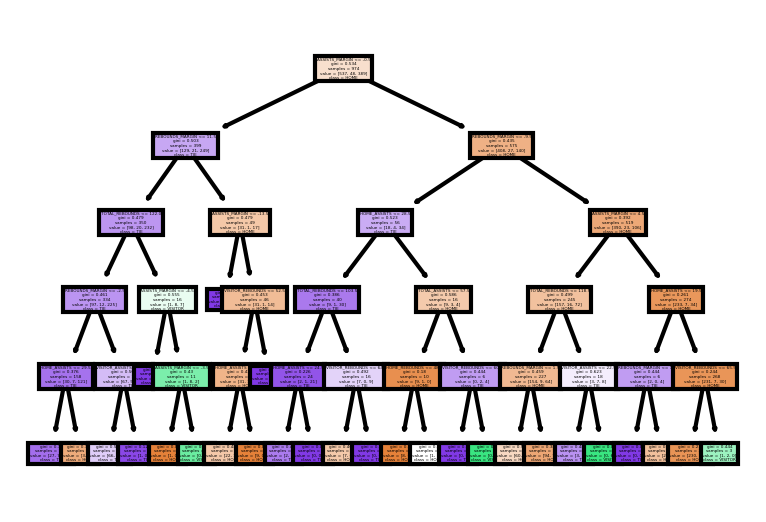

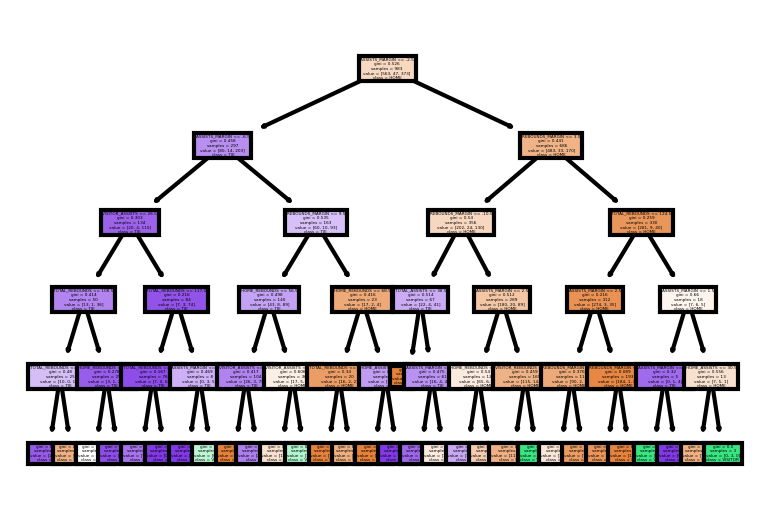

In [42]:
fn=assistsRebounds17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
print("Decision Tree-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic")
# 2017/18 Dataset
dt = DecisionTreeClassifier(max_depth=5, random_state=42) # 5 is chosen as max_depth for this model
dt.fit(X_train_17, y_train_17)
y_pred = dt.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 2018/19 Dataset
dt = DecisionTreeClassifier(max_depth=5, random_state=42) # 5 is chosen as max_depth for this model
dt.fit(X_train_18, y_train_18)
y_pred = dt.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))

# Decision Tree Visualisation
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Random Forest-based Classifier model

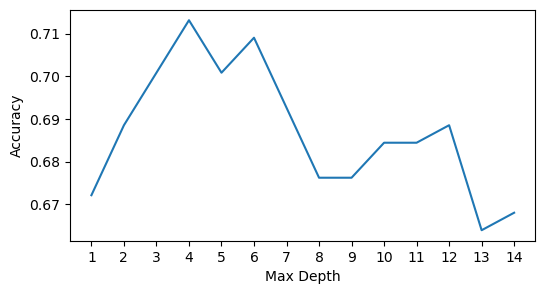

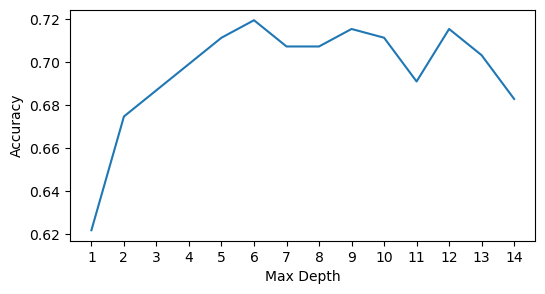

In [43]:
# Determining best value for max_depth parameter in classification model
# 2017/18 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_17, y_train_17)
    y_pred = rf.predict(X_test_17)
    accuracy = accuracy_score(y_test_17, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# 2018/19 Dataset
performance = []
for max_d in range(1, 15):
    rf = RandomForestClassifier(max_depth=max_d, random_state=0)
    rf.fit(X_train_18, y_train_18)
    y_pred = rf.predict(X_test_18)
    accuracy = accuracy_score(y_test_18, y_pred)
    performance.append(accuracy)
plt.figure(figsize=(6,3))
plt.plot(range(1, 15), performance)
plt.xticks(range(1, 15))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In the 2017/2018 datset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.67 to 0.71 accuracy, with the optimal max_depth being 4 
<br>
For the 2017/2018 season dataset, the <i>max_depth</i> paraemter impacts the accuracy of the classification from 0.62 to 0.72 accuracy, with the optimal max_depth being 4 

Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic
Classification on 2017/18 NBA season:
Accuracy: 0.7131147540983607
              precision    recall  f1-score   support

        HOME       0.74      0.80      0.77       133
         TIE       0.00      0.00      0.00        13
     VISITOR       0.68      0.69      0.69        98

    accuracy                           0.71       244
   macro avg       0.47      0.50      0.48       244
weighted avg       0.67      0.71      0.69       244



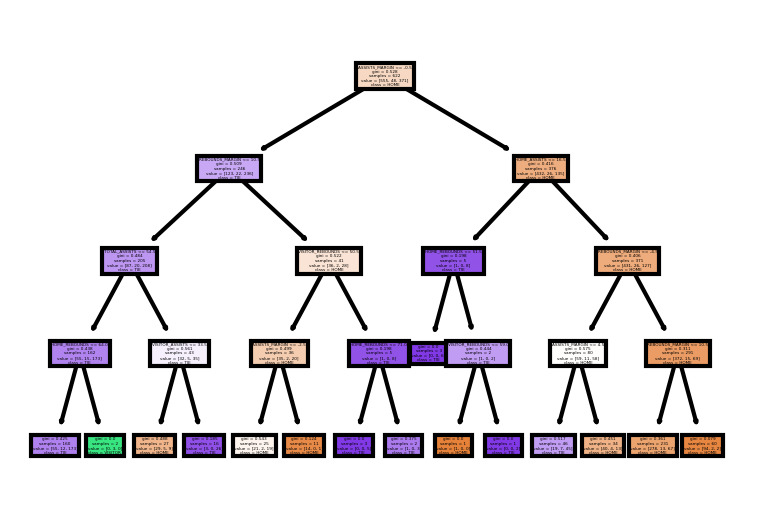

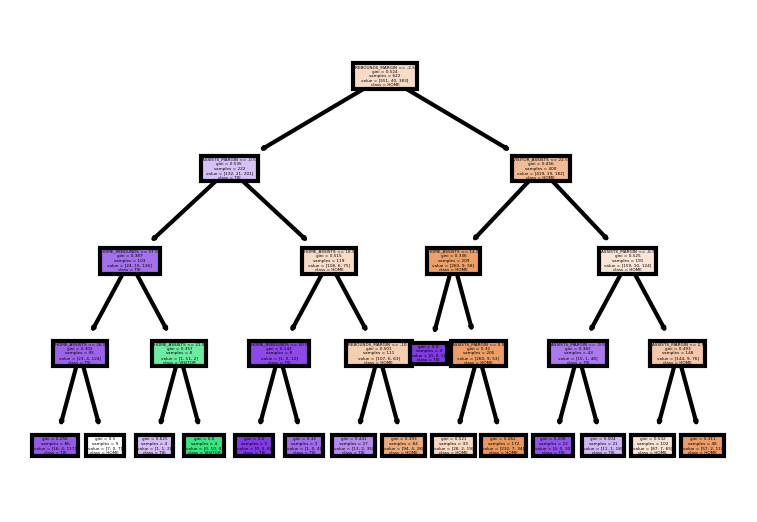

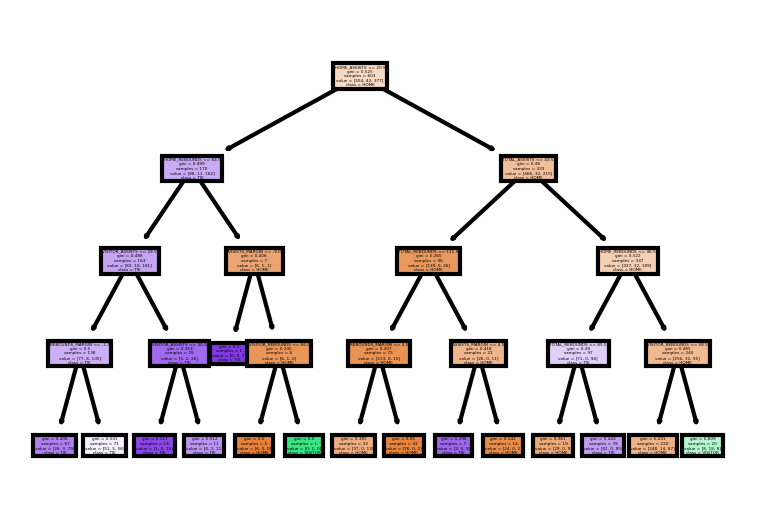

In [44]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic")
# 2017/18 Dataset
rf = RandomForestClassifier(max_depth=4, random_state=0) # 4 is chosen as max_depth for this model
rf.fit(X_train_17, y_train_17)
y_pred = rf.predict(X_test_17)
print("Classification on 2017/18 NBA season:")
print("Accuracy:", accuracy_score(y_test_17, y_pred))
print(classification_report(y_test_17, y_pred, zero_division=0))

# Random Forest Visualisation
fn=assistsRebounds17_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);


Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic


Classification on 2018/19 NBA season:
Accuracy: 0.6869918699186992
              precision    recall  f1-score   support

        HOME       0.67      0.91      0.77       129
         TIE       0.00      0.00      0.00        20
     VISITOR       0.73      0.54      0.62        97

    accuracy                           0.69       246
   macro avg       0.47      0.48      0.46       246
weighted avg       0.64      0.69      0.65       246



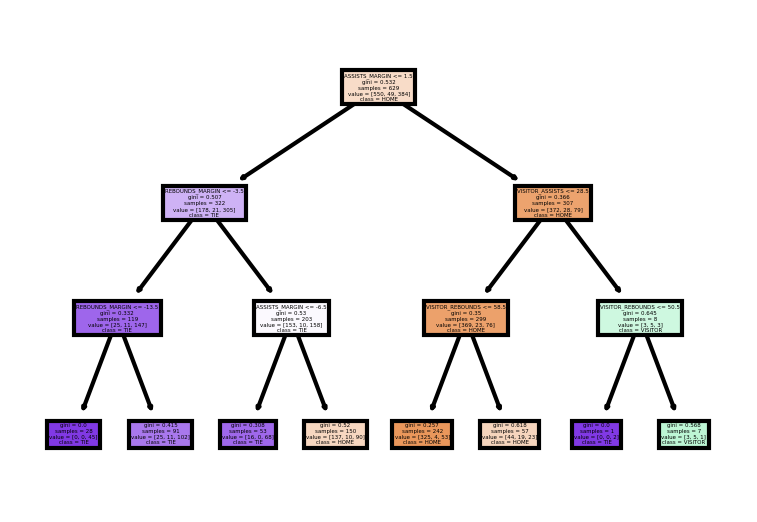

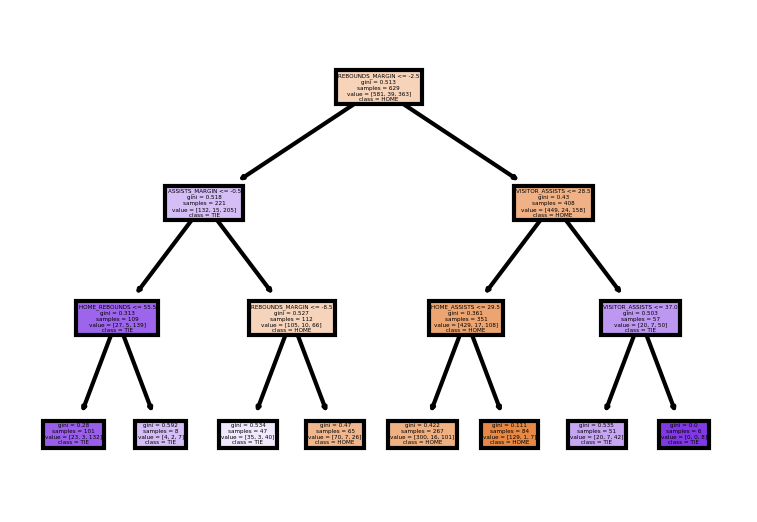

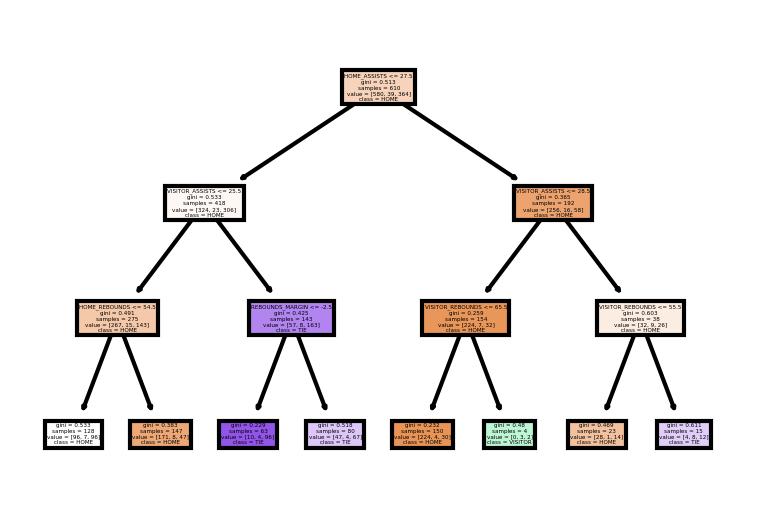

In [45]:
print("Random Forest-based Classifier Model for predicing result of an NBA game based on a team's rebound and assist statistic")
# 2018/19 Dataset
rf = RandomForestClassifier(max_depth=3, random_state=0) # 3 is chosen as max_depth for this model
rf.fit(X_train_18, y_train_18)
y_pred = rf.predict(X_test_18)
print("Classification on 2018/19 NBA season:")
print("Accuracy:", accuracy_score(y_test_18, y_pred))
print(classification_report(y_test_18, y_pred, zero_division=0))

# Random Forest Visualisation
fn=assistsRebounds18_X_Train.columns
cn=['HOME','VISITOR', 'TIE']
# 1st Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 50th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[49],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 100th Decision Tree in Random Forest Generated
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(rf.estimators_[99],
               feature_names = fn, 
               class_names=cn,
               filled = True);

**Discussion**
<br>
From looking at the figures above, we can see that around 66% to 71% of the winner of an NBA game can be predicted accurately by using the rebounds and assists statistics of both teams. The performance of the classification models also seem to be even when predicting the winners of the 2017/2018 and the 2018/2019 NBA season. After comparing the performance of the two classification models, it can be concluded that the Random Forest-based classification model is the better classification model for predicting the winner of an NBA game based on the rebounds and assists of the 2017/2018 season, however the classification models perform around the same level on the 2018/2019 season dataset.

**Recommendation**
<br>
NBA teams are recommended to focus more on the rebounding and assisting aspects of the game as a high rebound count can mean that a team is able to stop their opponent from scoring well, while generating more additional scoring opportunities. Furthermore, an NBA team that has a high assist count means that the team has great team cohesion, and is able to work together well in order to score more points, thus leading to winning more basketball games.

***
### Clustering Analysis Program
based on amount of times a player commits a foul with amount of times a player is fouled

In [46]:
# Remove rows with value '0' in PLAYER1_ID column
players_2016 = df_2016[df_2016.PLAYER1_ID != 0]
players_2017 = df_2017[df_2017.PLAYER1_ID != 0]
players_2018 = df_2018[df_2018.PLAYER1_ID != 0]

In [47]:
# Fouls committed by each player from the 2016/2017 to 2018/2019 NBA season
playerFouls_16 = players_2016.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouls_17 = players_2017.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouls_18 = players_2018.groupby('PLAYER1_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())

aggregate_playerFouls = pd.concat([playerFouls_16, playerFouls_17, playerFouls_18], axis=1)
playerFouls = aggregate_playerFouls.sum(axis=1)

# Remove row with 0 as PLAYER1_ID as it is an invalid value
playerFouls = playerFouls[playerFouls.index != 0].to_frame()
playerFouls.columns = ['FOULS']

In [48]:
# Fouls commited against each player from the 2016/2017 to 2018/2019 NBA season
playerFouleds_16 = players_2016.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouleds_17 = players_2017.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())
playerFouleds_18 = players_2018.groupby('PLAYER2_ID')['EVENTMSGTYPE'].apply(lambda x: (x == 6).sum())

aggregate_playerFouleds = pd.concat([playerFouleds_16, playerFouleds_17, playerFouleds_18], axis=1)
playerFouleds = aggregate_playerFouleds.sum(axis=1)

# Remove row with 0 as PLAYER1_ID as it is an invalid value
playerFouleds = playerFouleds[playerFouleds.index != 0].to_frame()
playerFouleds.columns = ['FOULEDS']

In [49]:
# Calculate how many games is the player involved in
def getGamesInvolved(player):    
    player_id = player.name
    
    gamesInvolved_2016 = df_2016.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    gamesInvolved_2017 = df_2017.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    gamesInvolved_2018 = df_2018.groupby('GAME_ID').apply(lambda x: (x['PLAYER1_ID'] == player_id).sum() +( x['PLAYER2_ID'] == player_id).sum() + (x['PLAYER3_ID'] == player_id).sum())
    
    return len(gamesInvolved_2016[gamesInvolved_2016 > 0]) + len(gamesInvolved_2017[gamesInvolved_2017 > 0]) + len(gamesInvolved_2018[gamesInvolved_2018 > 0]) 

In [50]:
# Get Fouls per Game for each NBA player
playerFouls['GAMES_INVOLVED'] = playerFouls.apply(lambda x: getGamesInvolved(x), axis=1)
playerFouls['FOULS_PER_GAME'] = playerFouls.apply(lambda x: x.FOULS/x.GAMES_INVOLVED if x.GAMES_INVOLVED != 0 else 0, axis=1)

In [52]:
# Get Fouleds per Game for each NBA player
playerFouleds['GAMES_INVOLVED'] = playerFouleds.apply(lambda x: getGamesInvolved(x), axis=1)
playerFouleds['FOULEDS_PER_GAME'] = playerFouleds.apply(lambda x: x.FOULEDS/x.GAMES_INVOLVED if x.GAMES_INVOLVED != 0 else 0, axis=1)

<AxesSubplot:xlabel='FOULEDS_PER_GAME', ylabel='FOULS_PER_GAME'>

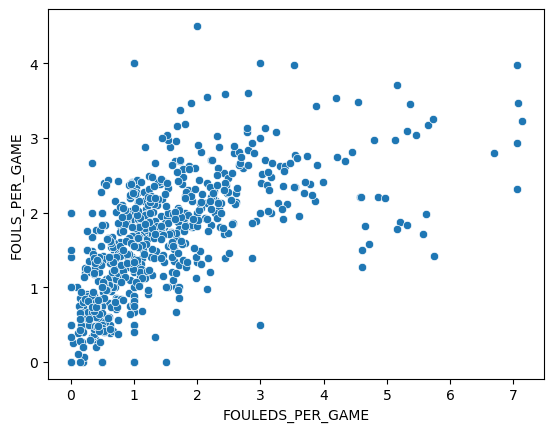

In [53]:
# Building scatter plot
sns.scatterplot(x=playerFouleds['FOULEDS_PER_GAME'], y=playerFouls['FOULS_PER_GAME'])

In [54]:
# Build dataframe for clustering
fouls_cluster_df = pd.merge(playerFouleds, playerFouls, left_index=True, right_index=True)[['FOULEDS_PER_GAME', 'FOULS_PER_GAME']]
fouls_cluster_df.head()

,FOULEDS_PER_GAME,FOULS_PER_GAME
1713.0,1.064286,1.821429
1718.0,1.333333,0.333333
1891.0,0.220339,1.186441
1897.0,1.000000,0.000000
1938.0,2.123288,1.931507


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

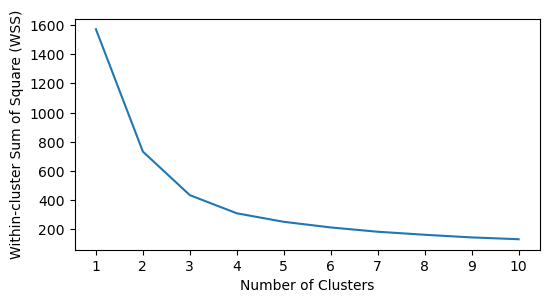

In [55]:
# Selecting optimal number of clusters by using Elbow Method
from sklearn.cluster import KMeans
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(fouls_cluster_df)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(range(1, 11), wss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster Sum of Square (WSS)")
plt.show()

To make sure that points within a cluster are as similar as possible, and that points belonging to different clusters are as distinct as possible. Inertia, a metric that is calculated as the sum of squared distances between data points and the centers of the clusters they belong to. 

By using the elbow method, we can observe that the optimal number of clusters seems to be around 4.

In [56]:
# Build dataframe for clustering
fouls_cluster_df = pd.merge(playerFouleds, playerFouls, left_index=True, right_index=True)[['FOULEDS_PER_GAME', 'FOULS_PER_GAME']]
fouls_cluster_df.head()

,FOULEDS_PER_GAME,FOULS_PER_GAME
1713.0,1.064286,1.821429
1718.0,1.333333,0.333333
1891.0,0.220339,1.186441
1897.0,1.000000,0.000000
1938.0,2.123288,1.931507


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


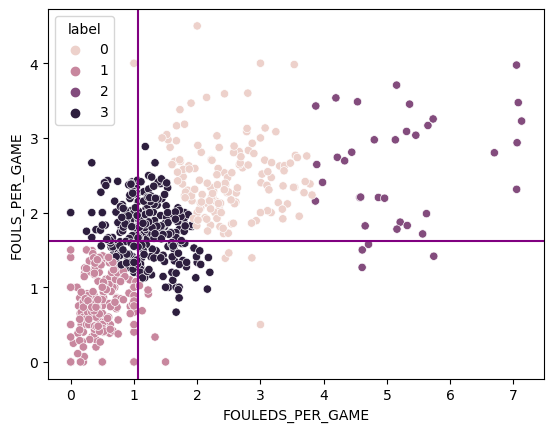

In [57]:
# K-Means Clustering
KM = KMeans(n_clusters=4, random_state=42, n_init=10)
KM.fit(fouls_cluster_df)
label = KM.fit_predict(fouls_cluster_df)
fouls_cluster_df['label']=label

# Visualise cluster
sns.scatterplot(x=fouls_cluster_df['FOULEDS_PER_GAME'], y=fouls_cluster_df['FOULS_PER_GAME'], hue=fouls_cluster_df['label'])

# Add median line to plot
plt.axvline(x=fouls_cluster_df['FOULEDS_PER_GAME'].median(), color='purple')
plt.axhline(y=fouls_cluster_df['FOULS_PER_GAME'].median(), color='purple')

**Breakdown of the Clusters in Clustering Analysis**
<ol>
    <li>
    Cluster 1 <i>(label 1)</i>
    <br> 
    This is a group of players that have not foul or get fouled by other players much. They have an below average amount of fouls and they get fouled a below average amount of times. This might be beause they are the type of players that respect the rules very much, and rarely do anything that warrants a foul called on them. It also might be becuase they simply have not played enough minutes in each game to have an opportunity to foul or get fouled.
    </li>
    <li>
    Cluster 2 <i>(label 3)</i>
    <br> 
    This is a group of players that represent the average NBA player. They have an average amount of fouls and they get fouled an average amount of times. All the data points in this cluster hover around the median line of both axes.
    </li>
    <li>
    Cluster 3 <i>(label 0)</i>
    <br> 
    This is a group of NBA players that have a slightly higher amount of fouls than the average NBA player but they get fouled a noticeably higher than average amount of times. These players might be players that play a significant amount of minutes in each of the games that they are involved, but they are not necessarily the primary star players.
    </li>
    <li>
    Cluster 4 <i>(label 2)</i>
    <br> 
    This is a group of NBA players that are the star players on their team. Although they only foul as much as the NBA players in Cluster 3, the amount of times that they get fouled by his opponent is significantly higher than the rest of the NBA player population. These are the players that are the players on their team, they play as much minutes as they can so that they can carry their team to a victory. They also will have the most touches on the ball, meaning that they have a higher chance of drawing contact and getting fouled by his opponent.
    </li>
</ol>

**Discussion**
<br>
From the Clustering Analysis above, we can see that star players are fouled significantly more than the average NBA player due to the fact that they have the ball most of the time and that their dangerous scoring skills will entice the opponent defender to foul him in order to stop him from scoring, which can increase the injury risk of these star players. To circumvent this issue, coaches of the NBA teams should manage the amount of minutes their star players play, in order to reduce the chance of their star player getting injured.

One criticicsm of the dataset is tha the dataset lacks information on how many minutes a player has played in a game. To illustrate its effects, in the clustering program constructed, although the statistics have already been adjusted to a per game basis, it is still not a sufficient adjustment as there are players that might play very little minutes throughout a game, which means that they have less chances of fouling, or getting fouled, which could not be reflected in the clustering program.